In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_C_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,NaN,0.0207,0.0954,0.0986,NaN,NaN,0.3109,0.2111,...,0.0232,NaN,0.0065,0.0159,NaN,0.0167,0.0180,0.0084,0.0090,0.0032
1,NaN,0.0523,NaN,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,NaN,...,0.0125,NaN,0.0089,0.0048,NaN,0.0191,0.0140,0.0049,0.0052,NaN
2,0.0262,0.0582,NaN,0.1083,0.0974,NaN,0.2431,0.3771,0.5598,NaN,...,0.0033,0.0232,NaN,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,NaN,NaN,0.0205,0.0205,0.0368,NaN,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,NaN,0.0085,0.0073,NaN,0.0044,0.0040,0.0117
4,0.0762,NaN,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,NaN,0.0110,0.0015,NaN,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,NaN,0.0115,NaN,0.0157
204,0.0323,NaN,0.0298,0.0564,0.0760,NaN,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,NaN
206,0.0303,0.0353,0.0490,0.0608,0.0167,NaN,0.1465,NaN,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,NaN,0.0034,NaN,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	44
float64		column 2	37
float64		column 3	45
float64		column 4	39
float64		column 5	37
float64		column 6	33
float64		column 7	58
float64		column 8	43
float64		column 9	42
float64		column 10	38
float64		column 11	41
float64		column 12	55
float64		column 13	37
float64		column 14	41
float64		column 15	45
float64		column 16	39
float64		column 17	41
float64		column 18	49
float64		column 19	40
float64		column 20	36
float64		column 21	47
float64		column 22	45
float64		column 23	41
float64		column 24	43
float64		column 25	42
float64		column 26	40
float64		column 27	50
float64		column 28	41
float64		column 29	47
float64		column 30	51
float64		column 31	35
float64		column 32	44
float64		column 33	46
float64		column 34	41
float64		column 35	38
float64		column 36	42
float64		column 37	36
float64		column 38	46
float64		column 39	45
float64		column 40	40
float64		column 41	35
float64		column 42	45
float64		column 43	41
float64		column 44	36
flo

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,164.000000,171.000000,163.000000,169.000000,171.000000,175.000000,150.000000,165.000000,166.000000,170.000000,...,167.000000,167.000000,170.000000,175.000000,176.000000,150.000000,169.000000,170.000000,172.000000,169.000000
mean,0.029335,0.040224,0.044991,0.055230,0.074921,0.107397,0.119303,0.134831,0.173462,0.209391,...,0.016046,0.013382,0.011021,0.011066,0.009242,0.007733,0.007807,0.008182,0.008065,0.006637
std,0.022511,0.034004,0.040480,0.048777,0.058964,0.060652,0.062928,0.084589,0.114476,0.134835,...,0.012613,0.008856,0.007229,0.007452,0.007211,0.005378,0.005880,0.006778,0.006550,0.005330
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.019300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013400,0.017550,0.018900,0.024500,0.035150,0.068050,0.077100,0.081300,0.095950,0.112200,...,0.007900,0.007700,0.005500,0.005450,0.003900,0.004125,0.003500,0.003600,0.003600,0.003100
50%,0.023200,0.032100,0.034600,0.044500,0.060800,0.098600,0.102900,0.113000,0.149400,0.180700,...,0.013700,0.011600,0.009650,0.009500,0.007500,0.006250,0.005800,0.005800,0.006150,0.005400
75%,0.036525,0.049650,0.058950,0.068100,0.098350,0.141900,0.148700,0.169000,0.221200,0.271250,...,0.020250,0.016750,0.015100,0.014500,0.012100,0.010025,0.010500,0.010500,0.010400,0.008500
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.658700,0.710600,...,0.100400,0.045900,0.039000,0.035200,0.044700,0.032600,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

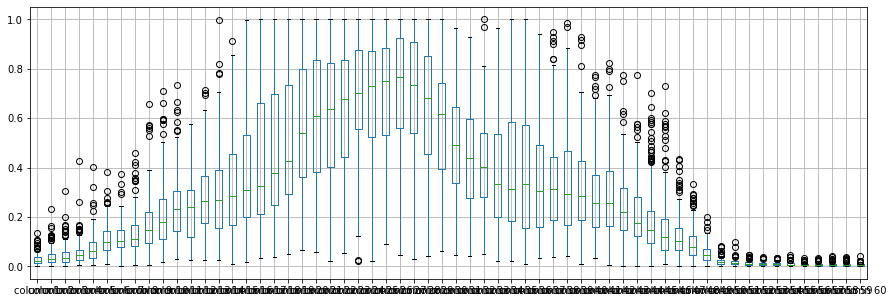

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.029335
column 2     0.040224
column 3     0.044991
column 4     0.055230
column 5     0.074921
column 6     0.107397
column 7     0.119303
column 8     0.134831
column 9     0.173462
column 10    0.209391
column 11    0.242305
column 12    0.237472
column 13    0.283830
column 14    0.295525
column 15    0.320166
column 16    0.375826
column 17    0.419932
column 18    0.466205
column 19    0.499023
column 20    0.563054
column 21    0.613138
column 22    0.611906
column 23    0.637651
column 24    0.682121
column 25    0.680489
column 26    0.693273
column 27    0.719713
column 28    0.698069
column 29    0.641002
column 30    0.575946
column 31    0.503477
column 32    0.438275
column 33    0.423956
column 34    0.390398
column 35    0.392946
column 36    0.388253
column 37    0.360841
column 38    0.340419
column 39    0.332642
column 40    0.318280
column 41    0.283928
column 42    0.286273
column 43    0.241359
column 44    0.213841
column 45    0.193305
column 46 

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.677935,0.583931,0.470534,0.287774,0.239842,0.220907,0.440823,0.298765,0.287347,...,0.271695,0.253725,0.305783,0.343067,0.309282,0.178129,0.250604,0.424976,0.428458,0.331577
column 2,0.677935,1.000000,0.810483,0.640653,0.484369,0.324474,0.313732,0.355931,0.277005,0.258975,...,0.300197,0.442416,0.324350,0.371567,0.438548,0.219041,0.251842,0.322337,0.342239,0.375037
column 3,0.583931,0.810483,1.000000,0.838460,0.603380,0.321385,0.130433,0.155922,0.151711,0.175026,...,0.187801,0.471657,0.385684,0.367805,0.279182,0.158388,0.365846,0.296963,0.463002,0.374258
column 4,0.470534,0.640653,0.838460,1.000000,0.769230,0.304955,0.232630,0.172063,0.178135,0.170437,...,0.148339,0.488499,0.438266,0.323097,0.292355,0.226624,0.423339,0.354731,0.472509,0.419439
column 5,0.287774,0.484369,0.603380,0.769230,1.000000,0.605173,0.386736,0.257746,0.168201,0.219120,...,0.113335,0.347392,0.380385,0.209376,0.242751,0.126322,0.300567,0.288724,0.354300,0.303619
column 6,0.239842,0.324474,0.321385,0.304955,0.605173,1.000000,0.729601,0.455371,0.251121,0.251762,...,0.159236,0.241042,0.177196,0.211091,0.082217,0.165460,0.101679,0.178037,0.207537,0.184666
column 7,0.220907,0.313732,0.130433,0.232630,0.386736,0.729601,1.000000,0.714101,0.426396,0.349487,...,0.144858,0.158369,0.003606,0.120075,0.208530,0.174254,0.213224,0.223846,0.133375,0.328221
column 8,0.440823,0.355931,0.155922,0.172063,0.257746,0.455371,0.714101,1.000000,0.735133,0.610661,...,0.203448,0.176667,0.096023,0.242749,0.287482,0.228715,0.317965,0.326339,0.150723,0.073682
column 9,0.298765,0.277005,0.151711,0.178135,0.168201,0.251121,0.426396,0.735133,1.000000,0.856584,...,0.195914,0.250962,0.149277,0.292228,0.163131,0.286432,0.192223,0.194086,0.103640,0.020947
column 10,0.287347,0.258975,0.175026,0.170437,0.219120,0.251762,0.349487,0.610661,0.856584,1.000000,...,0.166263,0.223793,0.157173,0.148541,0.115891,-0.073972,0.027131,0.191315,-0.016513,0.104973


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+24,60+24+24,60+24+24+24,60+24+24,60+24,60], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.085218869722807
Epoch: 1 , loss: 14.906535295339731
Epoch: 2 , loss: 14.807574345515324
Epoch: 3 , loss: 14.725440245408278
Epoch: 4 , loss: 14.661494988661547
Epoch: 5 , loss: 14.563522265507626
Epoch: 6 , loss: 14.492243620065542
Epoch: 7 , loss: 14.454130832965557
Epoch: 8 , loss: 14.366888266343336
Epoch: 9 , loss: 14.324403249300444
Epoch: 10 , loss: 14.166346843426044
Epoch: 11 , loss: 14.089688741243803
Epoch: 12 , loss: 13.942743668189415
Epoch: 13 , loss: 13.754546532264122
Epoch: 14 , loss: 13.493953338036171
Epoch: 15 , loss: 13.068810903109037
Epoch: 16 , loss: 12.569411497849684
Epoch: 17 , loss: 11.677528821505033
Epoch: 18 , loss: 10.612750860360952
Epoch: 19 , loss: 9.589928700373722
Epoch: 20 , loss: 8.781879938565767
Epoch: 21 , loss: 8.422687273759108
Epoch: 22 , loss: 8.01404542189378
Epoch: 23 , loss: 7.9934641397916355
Epoch: 24 , loss: 7.6474696306081915
Epoch: 25 , loss: 7.72

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.066400
column 2     0.057500
column 3     0.084200
column 4     0.037200
column 5     0.045800
column 6     0.077100
column 7     0.077100
column 8     0.113000
column 9     0.235300
column 10    0.183800
column 11    0.286900
column 12    0.412900
column 13    0.364700
column 14    0.304615
column 15    0.284000
column 16    0.372064
column 17    0.583700
column 18    0.679200
column 19    0.608600
column 20    0.485800
column 21    0.324600
column 22    0.201300
column 23    0.208200
column 24    0.168600
column 25    0.248400
column 26    0.273600
column 27    0.685247
column 28    0.465500
column 29    0.699000
column 30    0.747400
column 31    0.795600
column 32    0.798100
column 33    0.671500
column 34    0.369943
column 35    0.744000
column 36    0.816900
column 37    0.891200
column 38    0.313991
column 39    0.875300
column 40    0.706100
column 41    0.680300
column 42    0.589800
column 43    0.461800
column 44    0.363900
column 45    0.193591
column 46 

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.000000,0.000000,-0.001743,0.000000,0.0,0.000000,-0.055972,-0.055429,0.000000,0.000000,...,0.0,0.007699,0.00000,0.000000,-0.000914,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.019736,0.000000,-0.045179,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.115027,...,0.0,0.001123,0.00000,0.000000,-0.001731,0.000000,0.000000,0.000000,0.000000,0.003572
2,0.000000,0.000000,-0.070190,0.000000,0.0,-0.132937,0.000000,0.000000,0.000000,-0.432278,...,0.0,0.000000,-0.00738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.013596,-0.024072,0.000000,0.0,0.000000,-0.008662,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,-0.004414,0.000000,0.000000,0.003584,0.000000,0.000000,0.000000
4,0.000000,-0.021947,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.002324,0.000000,0.000000,0.000955,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.002686,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.001949,0.000000,-0.013333,0.000000
204,0.000000,0.015544,0.000000,0.000000,0.0,-0.021041,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
205,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003030
206,0.000000,0.000000,0.000000,0.000000,0.0,-0.054670,0.000000,-0.008510,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.002377,0.000000,-0.000508,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

9.527457796910229

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.21380687403995727

In [19]:
new_df.iloc[66,:]

column 1     0.026500
column 2     0.044000
column 3     0.037505
column 4     0.008400
column 5     0.030500
column 6     0.086162
column 7     0.034100
column 8     0.078000
column 9     0.084400
column 10    0.077900
column 11    0.032700
column 12    0.206000
column 13    0.190800
column 14    0.106500
column 15    0.145700
column 16    0.223200
column 17    0.207000
column 18    0.110500
column 19    0.107800
column 20    0.116500
column 21    0.428230
column 22    0.068900
column 23    0.451469
column 24    0.478757
column 25    0.090400
column 26    0.227800
column 27    0.587200
column 28    0.845700
column 29    0.846700
column 30    0.767900
column 31    0.805500
column 32    0.626000
column 33    0.654500
column 34    0.874700
column 35    0.988500
column 36    0.268277
column 37    0.696000
column 38    0.573300
column 39    0.587200
column 40    0.666300
column 41    0.565100
column 42    0.524700
column 43    0.190455
column 44    0.199700
column 45    0.151200
column 46 

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.020000,0.037100,0.041057,0.020700,0.0954,0.098600,0.097928,0.104671,0.310900,0.211100,...,0.0232,0.010399,0.00650,0.015900,0.006286,0.016700,0.018000,0.008400,0.009000,0.003200
1,0.025564,0.052300,0.039121,0.068900,0.1183,0.258300,0.215600,0.348100,0.333700,0.172173,...,0.0125,0.009523,0.00890,0.004800,0.007669,0.019100,0.014000,0.004900,0.005200,0.007972
2,0.026200,0.058200,0.039710,0.108300,0.0974,0.095063,0.243100,0.377100,0.559800,0.187122,...,0.0033,0.023200,0.00922,0.009500,0.018000,0.024400,0.031600,0.016400,0.009500,0.007800
3,0.010000,0.030696,0.038228,0.020500,0.0205,0.036800,0.101138,0.127600,0.059800,0.126400,...,0.0241,0.012100,0.00360,0.010586,0.008500,0.007300,0.008584,0.004400,0.004000,0.011700
4,0.076200,0.044653,0.048100,0.039400,0.0590,0.064900,0.120900,0.246700,0.356400,0.445900,...,0.0156,0.003100,0.00540,0.012824,0.011000,0.001500,0.008155,0.004800,0.010700,0.009400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.021386,0.034600,0.016800,0.017700,0.0393,0.163000,0.202800,0.169400,0.232800,0.268400,...,0.0203,0.011600,0.00980,0.019900,0.003300,0.010100,0.008449,0.011500,0.005967,0.015700
204,0.032300,0.025644,0.029800,0.056400,0.0760,0.074759,0.099000,0.101800,0.103000,0.215400,...,0.0051,0.006100,0.00930,0.013500,0.006300,0.006300,0.003400,0.003200,0.006200,0.006700
205,0.052200,0.043700,0.018000,0.029200,0.0351,0.117100,0.125700,0.117800,0.125800,0.252900,...,0.0155,0.016000,0.00290,0.005100,0.006200,0.008900,0.014000,0.013800,0.007700,0.006130
206,0.030300,0.035300,0.049000,0.060800,0.0167,0.080730,0.146500,0.103790,0.194500,0.235400,...,0.0042,0.008600,0.00460,0.012600,0.003600,0.005877,0.003400,0.007392,0.003600,0.004800


In [21]:
imputations[-1].to_excel("Sonar_C_20(imp).xlsx", index=False, header=False)